In [1]:
from vision_models_playground.predictors.yolo_predictor import YoloV1Predictor
from vision_models_playground.datasets.datasets import get_voc_detection_dataset_yolo, get_voc_detection_dataset_raw
from vision_models_playground.utility.load_models import load_best_model

model = load_best_model("../models/train/ResNetYoloV1/2023-07-06_14-37-23")
class_map = get_voc_detection_dataset_yolo(root='../data')[1].class_map
predictor = YoloV1Predictor(model, threshold=0.2, class_map=class_map)
voc_test = get_voc_detection_dataset_raw(root='../data')[1]

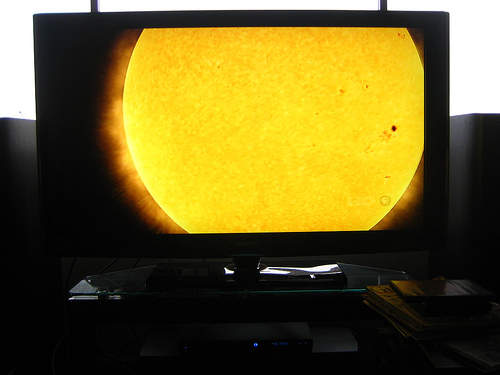

In [2]:
image = voc_test[0][0]
image

In [3]:
objects = predictor.predict(image)[0]
objects

/home/alexandru/anaconda3/envs/vmp/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[{'class_id': 19,
  'class_name': 'tvmonitor',
  'confidence': 0.22791041433811188,
  'x_min': 83,
  'y_min': 13,
  'x_max': 441,
  'y_max': 237}]

In [4]:
import PIL
import numpy as np
import cv2


def draw_objects(image, objects):
    image_edited = np.array(image)
    for obj in objects:
        # assign a random color
        color = hash(obj['class_name'])
        color = (color & 0xFF, (color >> 8) & 0xFF, (color >> 16) & 0xFF)

        x_min = obj['x_min']
        y_min = obj['y_min']
        x_max = obj['x_max']
        y_max = obj['y_max']
        name = obj['class_name']
        confidence = obj['confidence']

        display = f"{name} {confidence:.2f}"

        cv2.rectangle(image_edited, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(image_edited, display, (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    image_edited = PIL.Image.fromarray(image_edited)
    return image_edited

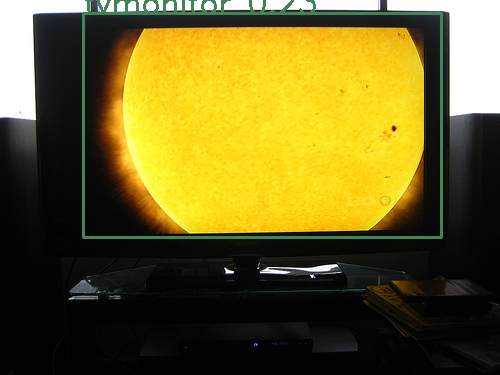

In [5]:
image_edited = draw_objects(image, objects)
image_edited

In [10]:
def detect_object(i, threshold):
    image = voc_test[i][0]
    predictor = YoloV1Predictor(model, threshold=threshold, class_map=class_map)
    objects = predictor.predict(image)[0]
    image_edited = draw_objects(image, objects)
    return image_edited

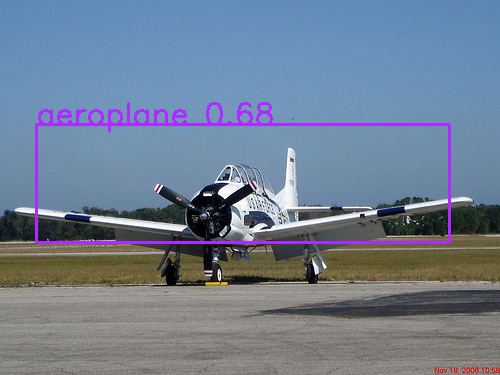

In [12]:
detect_object(5, 0.64)

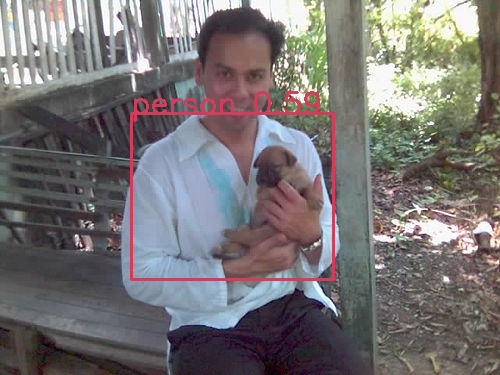

In [17]:
detect_object(6, 0.57)

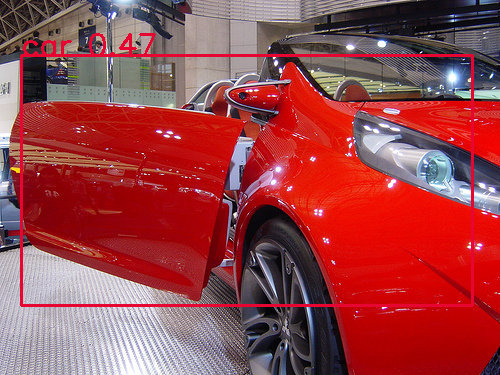

In [21]:
detect_object(7, 0.43)

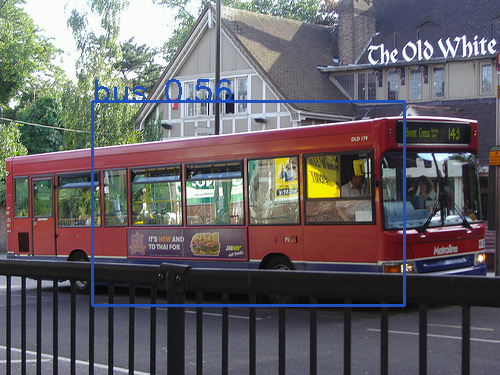

In [23]:
detect_object(8, 0.56)

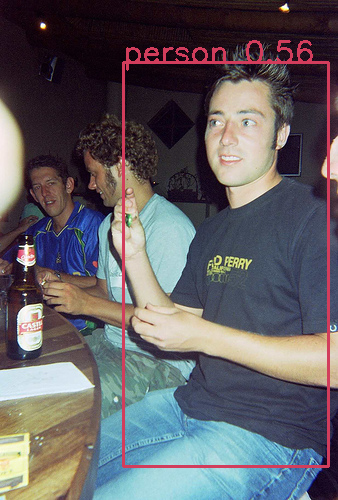

In [24]:
detect_object(9, 0.56)

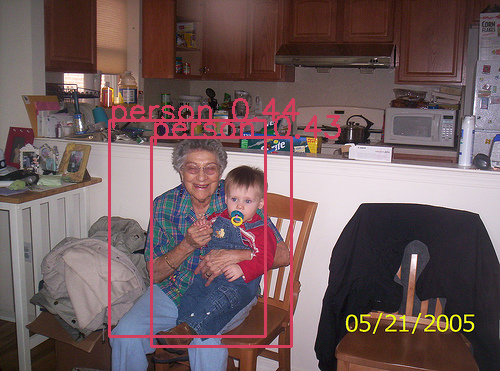

In [42]:
detect_object(13, 0.42)

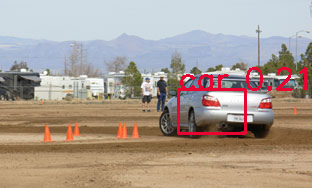

In [44]:
detect_object(14, 0.20)

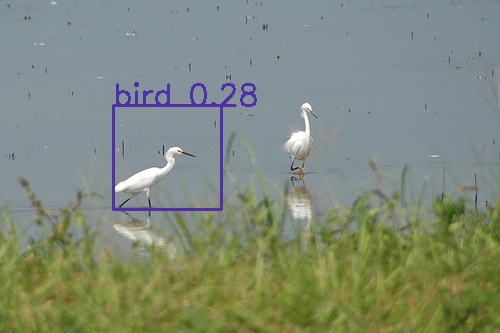

In [54]:
detect_object(15, 0.25)

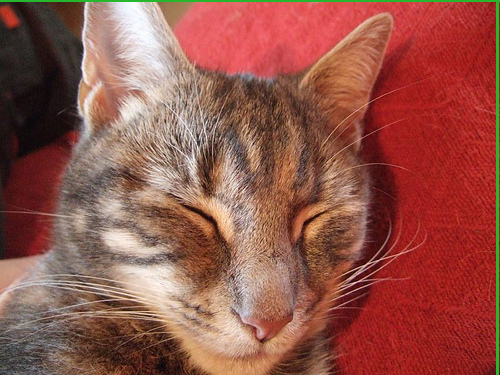

In [55]:
detect_object(16, 0.25)

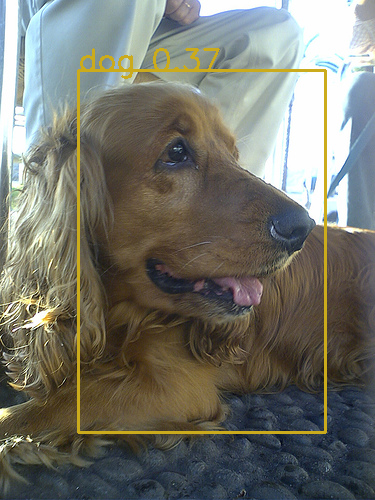

In [58]:
detect_object(17, 0.35)

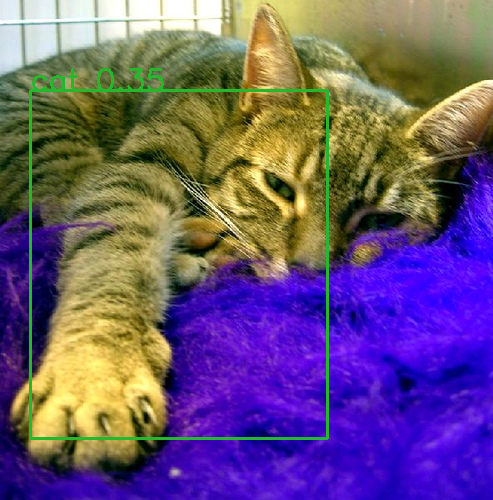

In [62]:
detect_object(18, 0.35)

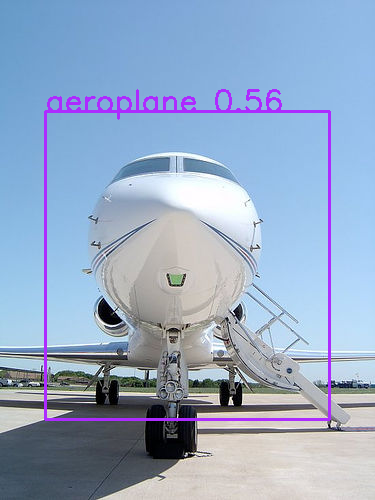

In [64]:
detect_object(19, 0.50)

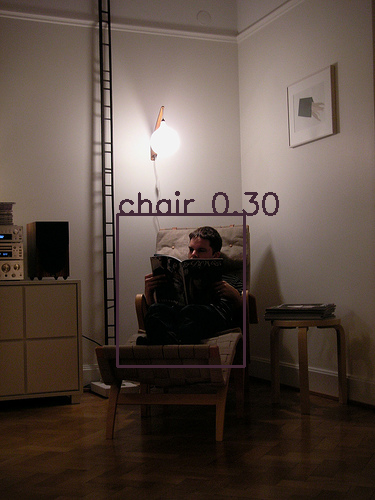

In [71]:
detect_object(20, 0.23)

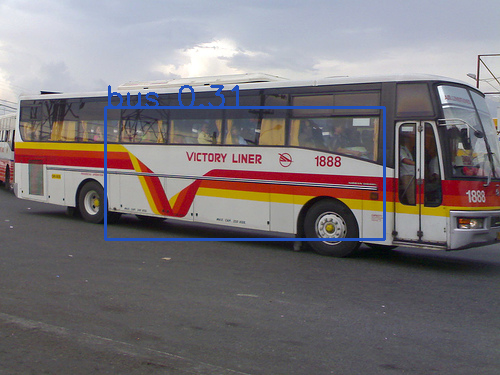

In [74]:
detect_object(22, 0.30)

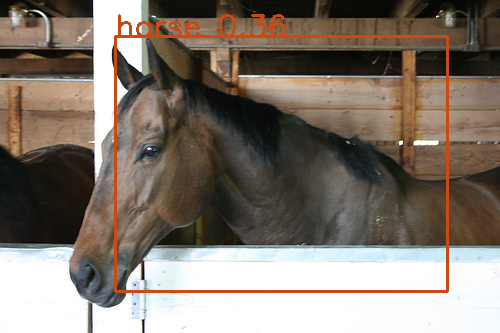

In [83]:
detect_object(23, 0.355)